# Sea Surface Height Reconstruction: Assessing the Influence of Nadir Constellation Density (6 vs. 3)
## Examining the Statistical Significance of Mapping Error between two reconstructions

<div style="text-align: right"><i> 2024-05-20 MIOST_6NADIRS_vs_3NADIRS_SSH_BENCHMARK_DEMO </i></div>

***
**Authors:**  CLS & DATLAS <br>
**Copyright:** 2024 CLS & DATLAS <br>
**License:** MIT

<div class="alert alert-block alert-success">
<h1><center>Benchmark of MIOST sea surface height maps cosntructed from 6 nadirs vs 3 nadirs</center></h1>
<h5> The notebook aims to evaluate the sea surface height maps produced by the MIOST system. </h5>
        <h5> We provide below a demonstration of the intercomparison of the RMSE maps between two scenarios </h5>
</div>

In [1]:
from glob import glob
import numpy as np
import os

In [2]:
import sys
sys.path.append('..')
from src.mod_plot import *
from src.mod_stat import *
from src.mod_spectral import *

In [3]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

<div class="alert alert-info" role="alert">

<h2>0. Parameters</h2>

</div>

In [4]:
time_min = '2023-08-01'                                                      # time min for analysis
time_max = '2024-05-01'                                                      # time max for analysis
output_dir = './results'                                                     # output directory path
os.system(f'mkdir -p {output_dir}')
stat_output_filename = f'{output_dir}/stat_mapping_miost_6nadirs_vs_3nadirs.nc'  # output statistical analysis filename
lambda_min = 65.                                                             # minimun spatial scale in kilometer to consider on the filtered signal
lambda_max = 200.                                                            # maximum spatial scale in kilometer to consider on the filtered signal

<div class="alert alert-info" role="alert">

<h2>1. Input files</h2>

</div>

## Sea Surface Height from Saral/AltiKa

In [5]:
%%time
list_of_file = sorted(glob('../data/independent_alongtrack/al/*/*.nc'))
ds_alg = xr.open_mfdataset(list_of_file, combine='nested', concat_dim='time')
ds_alg = ds_alg.where((ds_alg.time >= np.datetime64(time_min)) & (ds_alg.time <=  np.datetime64(time_max)), drop=True)
ds_alg['longitude'] = ds_alg['longitude'] % 360.
ds_alg = ds_alg.sortby('time')
ds_alg

CPU times: user 20.9 s, sys: 8.76 s, total: 29.7 s
Wall time: 30 s


<xarray.Dataset>
Dimensions:         (time: 10792492)
Coordinates:
  * time            (time) datetime64[ns] 2023-08-01T00:11:42.253617152 ... 2...
    longitude       (time) float64 dask.array<chunksize=(44060,), meta=np.ndarray>
    latitude        (time) float64 dask.array<chunksize=(44060,), meta=np.ndarray>
Data variables:
    cycle           (time) float32 dask.array<chunksize=(44060,), meta=np.ndarray>
    track           (time) float32 dask.array<chunksize=(44060,), meta=np.ndarray>
    sla_filtered    (time) float32 dask.array<chunksize=(44060,), meta=np.ndarray>
    sla_unfiltered  (time) float32 dask.array<chunksize=(44060,), meta=np.ndarray>
    flag            (time) float32 dask.array<chunksize=(44060,), meta=np.ndarray>
    dac             (time) float32 dask.array<chunksize=(44060,), meta=np.ndarray>
    ocean_tide      (time) float32 dask.array<chunksize=(44060,), meta=np.ndarray>
    internal_tide   (time) float32 dask.array<chunksize=(44060,), meta=np.ndarray>
    lwe             (time) float32 dask.array<chunksize=(44060,), meta=np.ndarray>
    mdt             (time) float32 dask.array<chunksize=(44060,), meta=np.ndarray>
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Swath
    comment:                         Sea Surface Height measured by altimeter...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    summary:                         SSALTO/DUACS Near-Real-Time Level-3 sea ...
    time_coverage_duration:          P23H56M4.225698S
    time_coverage_end:               2023-06-10T23:59:37Z
    time_coverage_resolution:        P1S
    time_coverage_start:             2023-06-10T00:03:33Z
    title:                           NRT Altika Drifting Phase Global Ocean A...

## Sea Surface Height maps 3 nadirs to evaluate

In [6]:
%%time
list_of_maps = sorted(glob('../data/mapping_miost_s3a_s3b_s6a-hr/*.nc'))
ds_maps_3nadirs = xr.open_mfdataset(list_of_maps, combine='nested', concat_dim='time')
ds_maps_3nadirs = ds_maps_3nadirs.sel(time=slice(time_min, time_max))
ds_maps_3nadirs

CPU times: user 7.8 s, sys: 3.2 s, total: 11 s
Wall time: 43.9 s


<xarray.Dataset>
Dimensions:             (longitude: 3600, latitude: 1701, time: 275, bounds: 2)
Coordinates:
  * longitude           (longitude) float64 0.0 0.1 0.2 ... 359.7 359.8 359.9
  * latitude            (latitude) float32 -80.0 -79.9 -79.8 ... 89.8 89.9 90.0
  * time                (time) datetime64[ns] 2023-08-01 ... 2024-05-01
    longitude_bounds    (longitude, bounds) float64 dask.array<chunksize=(3600, 2), meta=np.ndarray>
    latitude_bounds     (latitude, bounds) float64 dask.array<chunksize=(1701, 2), meta=np.ndarray>
Dimensions without coordinates: bounds
Data variables:
    sla                 (time, latitude, longitude) float64 dask.array<chunksize=(1, 1701, 3600), meta=np.ndarray>
    ugosa               (time, latitude, longitude) float64 dask.array<chunksize=(1, 1701, 3600), meta=np.ndarray>
    vgosa               (time, latitude, longitude) float64 dask.array<chunksize=(1, 1701, 3600), meta=np.ndarray>
    relative_vorticity  (time, latitude, longitude) float64 dask.array<chunksize=(1, 1701, 3600), meta=np.ndarray>
    adt                 (time, latitude, longitude) float64 dask.array<chunksize=(1, 1701, 3600), meta=np.ndarray>
    ugos                (time, latitude, longitude) float64 dask.array<chunksize=(1, 1701, 3600), meta=np.ndarray>
    vgos                (time, latitude, longitude) float64 dask.array<chunksize=(1, 1701, 3600), meta=np.ndarray>
Attributes: (12/45)
    description:                      Miost analysis 
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         
    ...                              ...
    summary:                         Experimental SSALTO/DUACS Delayed-Time L...
    time_coverage_duration:          P1D
    time_coverage_resolution:        P1D
    title:                           DT merged all satellites Global Ocean Gr...
    time_coverage_start:             2023-07-27T12:00:00Z
    time_coverage_end:               2023-07-27T12:00:00Z

In [7]:
%%time
list_of_maps = sorted(glob('../data/mapping_miost_c2n_h2b_j3n_s3a_s3b_s6a-hr/*.nc'))
ds_maps_6nadirs = xr.open_mfdataset(list_of_maps, combine='nested', concat_dim='time')
ds_maps_6nadirs = ds_maps_6nadirs.sel(time=slice(time_min, time_max))
ds_maps_6nadirs

CPU times: user 3.08 s, sys: 1.24 s, total: 4.32 s
Wall time: 8.32 s


<xarray.Dataset>
Dimensions:             (longitude: 3600, latitude: 1701, time: 275)
Coordinates:
  * longitude           (longitude) float64 0.0 0.1 0.2 ... 359.7 359.8 359.9
  * latitude            (latitude) float32 -80.0 -79.9 -79.8 ... 89.8 89.9 90.0
  * time                (time) datetime64[ns] 2023-08-01 ... 2024-05-01
Data variables:
    sla                 (time, latitude, longitude) float64 dask.array<chunksize=(1, 1701, 3600), meta=np.ndarray>
    ugosa               (time, latitude, longitude) float64 dask.array<chunksize=(1, 1701, 3600), meta=np.ndarray>
    vgosa               (time, latitude, longitude) float64 dask.array<chunksize=(1, 1701, 3600), meta=np.ndarray>
    relative_vorticity  (time, latitude, longitude) float64 dask.array<chunksize=(1, 1701, 3600), meta=np.ndarray>
    adt                 (time, latitude, longitude) float64 dask.array<chunksize=(1, 1701, 3600), meta=np.ndarray>
    ugos                (time, latitude, longitude) float64 dask.array<chunksize=(1, 1701, 3600), meta=np.ndarray>
    vgos                (time, latitude, longitude) float64 dask.array<chunksize=(1, 1701, 3600), meta=np.ndarray>

<div class="alert alert-info" role="alert">
<h2>2. Statistical analysis</h2>
</div>

## 2.1 Interpolate sea surface height maps onto along-track positions

In [8]:
ds_interp_3nadirs = run_interpolation(ds_maps_3nadirs, ds_alg)
ds_interp_3nadirs = ds_interp_3nadirs.dropna('time')
ds_interp_3nadirs

2024-11-22 10:31:07 INFO     fetch data from 2023-08-01 00:00:00 to 2023-09-01 00:00:00
2024-11-22 10:31:13 INFO     fetch data from 2023-08-31 00:00:00 to 2023-10-01 00:00:00
2024-11-22 10:31:18 INFO     fetch data from 2023-09-30 00:00:00 to 2023-11-01 00:00:00
2024-11-22 10:31:24 INFO     fetch data from 2023-10-31 00:00:00 to 2023-12-01 00:00:00
2024-11-22 10:31:29 INFO     fetch data from 2023-11-30 00:00:00 to 2024-01-01 00:00:00
2024-11-22 10:31:34 INFO     fetch data from 2023-12-31 00:00:00 to 2024-02-01 00:00:00
2024-11-22 10:31:39 INFO     fetch data from 2024-01-31 00:00:00 to 2024-03-01 00:00:00
2024-11-22 10:31:44 INFO     fetch data from 2024-02-29 00:00:00 to 2024-04-01 00:00:00
2024-11-22 10:31:49 INFO     fetch data from 2024-03-31 00:00:00 to 2024-05-01 00:00:00


<xarray.Dataset>
Dimensions:            (time: 10749260)
Coordinates:
  * time               (time) datetime64[ns] 2023-08-01T00:11:42.253617152 .....
Data variables: (12/13)
    cycle              (time) float32 173.0 173.0 173.0 ... 181.0 181.0 181.0
    track              (time) float32 805.0 805.0 805.0 ... 633.0 633.0 633.0
    sla_filtered       (time) float32 -0.045 -0.027 -0.016 ... 0.193 0.188 0.186
    sla_unfiltered     (time) float32 -0.026 -0.066 0.031 ... 0.2 0.179 0.177
    flag               (time) float32 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    dac                (time) float32 0.184 0.184 0.184 ... 0.048 0.048 0.048
    ...                 ...
    internal_tide      (time) float32 0.0 0.0 0.0 0.0 ... -0.001 -0.001 -0.001
    lwe                (time) float32 0.019 0.018 0.018 ... -0.005 -0.005 -0.005
    mdt                (time) float32 -1.247 -1.228 -1.223 ... 0.852 0.852 0.852
    longitude          (time) float64 100.6 100.3 100.3 ... 88.42 88.4 88.39
    latitude           (time) float64 -60.31 -60.01 -59.95 ... -0.02314 0.03816
    msla_interpolated  (time) float64 0.01297 -0.02442 ... 0.1945 0.1949

In [9]:
ds_interp_6nadirs = run_interpolation(ds_maps_6nadirs, ds_alg)
ds_interp_6nadirs = ds_interp_6nadirs.dropna('time')
ds_interp_6nadirs

2024-11-22 10:32:14 INFO     fetch data from 2023-08-01 00:00:00 to 2023-09-01 00:00:00
2024-11-22 10:32:19 INFO     fetch data from 2023-08-31 00:00:00 to 2023-10-01 00:00:00
2024-11-22 10:32:25 INFO     fetch data from 2023-09-30 00:00:00 to 2023-11-01 00:00:00
2024-11-22 10:32:31 INFO     fetch data from 2023-10-31 00:00:00 to 2023-12-01 00:00:00
2024-11-22 10:32:37 INFO     fetch data from 2023-11-30 00:00:00 to 2024-01-01 00:00:00
2024-11-22 10:32:43 INFO     fetch data from 2023-12-31 00:00:00 to 2024-02-01 00:00:00
2024-11-22 10:32:48 INFO     fetch data from 2024-01-31 00:00:00 to 2024-03-01 00:00:00
2024-11-22 10:32:54 INFO     fetch data from 2024-02-29 00:00:00 to 2024-04-01 00:00:00
2024-11-22 10:33:00 INFO     fetch data from 2024-03-31 00:00:00 to 2024-05-01 00:00:00


<xarray.Dataset>
Dimensions:            (time: 10749260)
Coordinates:
  * time               (time) datetime64[ns] 2023-08-01T00:11:42.253617152 .....
Data variables: (12/13)
    cycle              (time) float32 173.0 173.0 173.0 ... 181.0 181.0 181.0
    track              (time) float32 805.0 805.0 805.0 ... 633.0 633.0 633.0
    sla_filtered       (time) float32 -0.045 -0.027 -0.016 ... 0.193 0.188 0.186
    sla_unfiltered     (time) float32 -0.026 -0.066 0.031 ... 0.2 0.179 0.177
    flag               (time) float32 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    dac                (time) float32 0.184 0.184 0.184 ... 0.048 0.048 0.048
    ...                 ...
    internal_tide      (time) float32 0.0 0.0 0.0 0.0 ... -0.001 -0.001 -0.001
    lwe                (time) float32 0.019 0.018 0.018 ... -0.005 -0.005 -0.005
    mdt                (time) float32 -1.247 -1.228 -1.223 ... 0.852 0.852 0.852
    longitude          (time) float64 100.6 100.3 100.3 ... 88.42 88.4 88.39
    latitude           (time) float64 -60.31 -60.01 -59.95 ... -0.02314 0.03816
    msla_interpolated  (time) float64 -0.005286 -0.03716 ... 0.1824 0.1828

### ```compute_stat_scores_intercompare``` will produce a file with RMSE maps scores for each gridded dataset as well as the associated value statistical test
### The test is based on scipy.stats.ttest_rel function which calculate the t-test on the MSE of the two map samples.
### For more detail see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html 

In [10]:
compute_stat_scores_intercompare(ds_interp_3nadirs, ds_interp_6nadirs, lambda_min, lambda_max, stat_output_filename)

2024-11-22 10:33:08 INFO     Compute mapping error all scales
2024-11-22 10:33:09 INFO     Compute mapping error for scales between 65.0 and 200.0 km
2024-11-22 10:33:58 INFO     Compute binning statistics
2024-11-22 10:38:09 INFO     Stat file saved as: ./results/stat_mapping_miost_6nadirs_vs_3nadirs.nc


### The upper figures illustrate the mapping error (RMSE) of the 3-nadir dataset, presented for all spatial scales and for scales smaller than 200 km. 
### The bottom figures show the reduction in RMSE when comparing the 6-nadir mapping product to the 3-nadir product. 
### Blue regions represent areas where the 6-nadir product has a lower RMSE compared to the 3-nadir product, indicating improved accuracy. 
### Overall, mapping errors are reduced across most regions in the 6 nadirs product, with the most significant improvements observed in the energetic & western boundary currents. 
### Yellow dots indicate areas where the differences in mapping errors between the two products are statistically insignificant, based on a t-statistic with a p-value greater than 0.05.
### In regions where errors are significantly different, the p-value is less than 0.05, confirming the robustness of the improvements in the 6-nadir product.

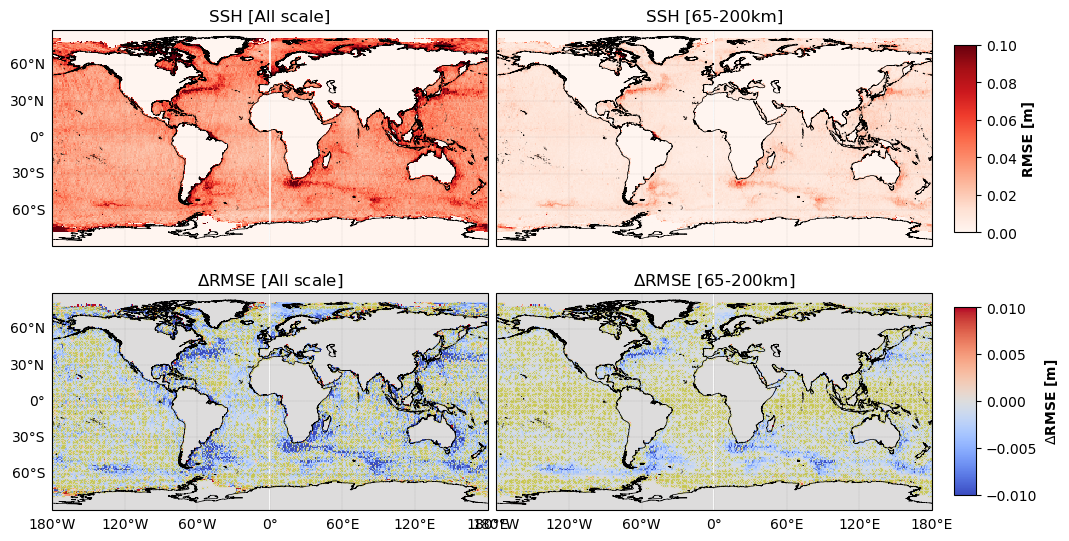

In [11]:
plot_stat_score_map_png_compa(stat_output_filename)